Number of data points before oversampling method  ckd       248
notckd    150
Name: classification, dtype: int64
#####################
Number of training data points method  (238, 25)
### KNN Model Accuracy Metrics ###


knn_model accuracy 98 %
knn_model precision 97 %
knn_model recall 98 %
### logistic Model Accuracy Metrics ###


C:\Users\pudot\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


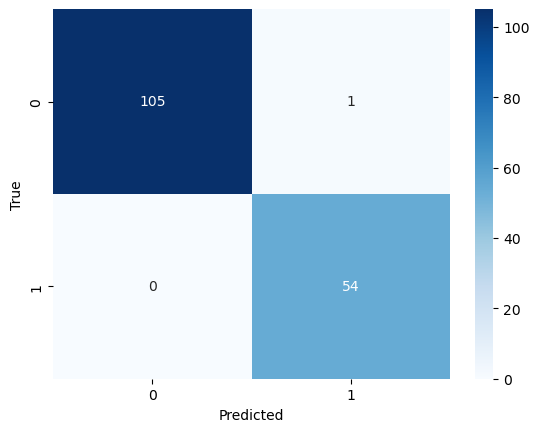

logistic_model accuracy 99 %
logistic_model precision 99 %
logistic_model recall 99 %


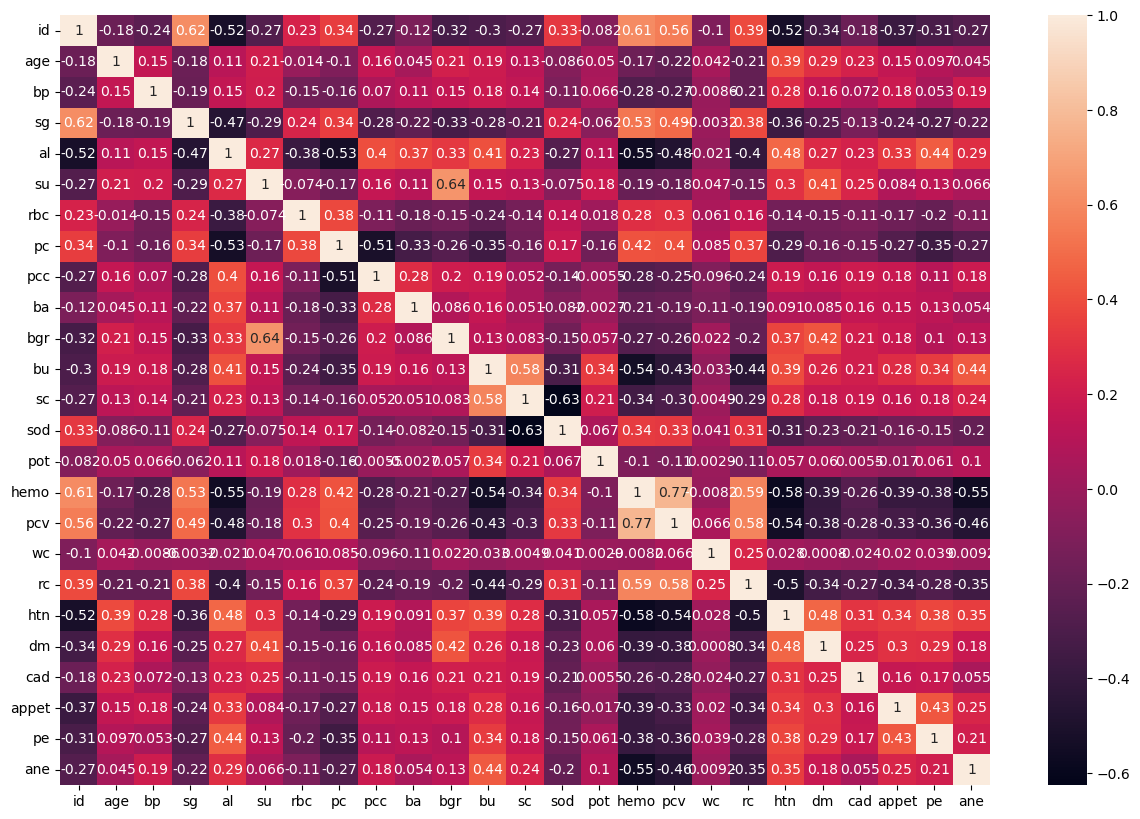

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
import pickle as pkl
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


def data_reading():
    '''
    reading dataset using padas dataframe
    '''
    dataset=pd.read_csv('./kidney_disease.csv')
    dataset = dataset[~dataset['classification'].isin(['ckd\t'])]
    return dataset

def finding_and_filling_null_values(df):
    '''
    Replacing the int column null values with mean and categorical columns with mode
    '''
    df['age'].fillna((df['age'].mean()), inplace=True)
    df['bp'].fillna((df['bp'].mean()), inplace=True)
    df['sg'].fillna((df['sg'].mean()), inplace=True)
    df['al'].fillna((df['al'].mean()), inplace=True)
    df['su'].fillna((df['su'].mean()), inplace=True)
    df['bgr'].fillna((df['bgr'].mean()), inplace=True)
    df['bu'].fillna((df['bu'].mean()), inplace=True)
    df['sc'].fillna((df['sc'].mean()), inplace=True)
    df['sod'].fillna((df['sod'].mean()), inplace=True) 
    df['pot'].fillna((df['pot'].mean()), inplace=True)
    df['hemo'].fillna((df['hemo'].mean()), inplace=True)
    
    df['rbc'].fillna((df['rbc'].mode()[0]), inplace=True)
    df['pc'].fillna((df['pc'].mode()[0]), inplace=True)
    df['pcc'].fillna((df['pcc'].mode()[0]), inplace=True)
    df['ba'].fillna((df['ba'].mode()[0]), inplace=True)
    df['pcv'].fillna((df['pcv'].mode()[0]), inplace=True)
    df['wc'].fillna((df['wc'].mode()[0]), inplace=True)
    df['rc'].fillna((df['rc'].mode()[0]), inplace=True)
    df['htn'].fillna((df['htn'].mode()[0]), inplace=True)
    df['dm'].fillna((df['dm'].mode()[0]), inplace=True)
    df['cad'].fillna((df['cad'].mode()[0]), inplace=True)
    df['appet'].fillna((df['appet'].mode()[0]), inplace=True)
    df['pe'].fillna((df['pe'].mode()[0]), inplace=True)
    df['ane'].fillna((df['ane'].mode()[0]), inplace=True) 
    return df

def finding_the_duplicate_values(cleaned_dataset):
    '''
    finding the duplicate rows but none is found
    '''
    duplicate=data.duplicated().sum()
    
def converting_categorical_into_numerical(cleaned_data):
    '''
    Converting categorical columns into numerical columns using encoding techniques
    '''
    encoder=LabelEncoder()
    cleaned_data['rbc']=encoder.fit_transform(cleaned_data['rbc'].values)
    cleaned_data['pc']=encoder.fit_transform(cleaned_data['pc'].values)
    cleaned_data['pcc']=encoder.fit_transform(cleaned_data['pcc'].values)
    cleaned_data['ba']=encoder.fit_transform(cleaned_data['ba'].values)
    cleaned_data['pcv']=encoder.fit_transform(cleaned_data['pcv'].values)
    cleaned_data['wc']=encoder.fit_transform(cleaned_data['wc'].values)
    cleaned_data['rc']=encoder.fit_transform(cleaned_data['rc'].values)
    cleaned_data['htn']=encoder.fit_transform(cleaned_data['htn'].values)
    cleaned_data['dm']=encoder.fit_transform(cleaned_data['dm'].values)
    cleaned_data['cad']=encoder.fit_transform(cleaned_data['cad'].values)
    cleaned_data['appet']=encoder.fit_transform(cleaned_data['appet'].values)
    cleaned_data['pe']=encoder.fit_transform(cleaned_data['pe'].values)
    cleaned_data['ane']=encoder.fit_transform(cleaned_data['ane'].values)
    return cleaned_data

    
def splitting_dataset_into_training_and_testing(cleaned_dataset):
    '''
    Splitting the given dataset into training and testing
    '''
    x=cleaned_dataset.drop(['classification'],axis=1)
    y=cleaned_dataset['classification']
    X_train,x_test,Y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=24)
    return X_train,x_test,Y_train,y_test
   
def oversampling_technique(X_train,Y_train):
    '''
    The dataset identified as imbalanced 
    class ckd has 248 data points and class 'not ckd' has 150 data points 
    '''
    smote=SMOTE()
    X_oversampled,y_oversampled=smote.fit_resample(X_train,Y_train)
    return X_oversampled,y_oversampled



def RandomForest_classifier(x_train,y_train,x_test,y_test):
    '''
    Fitting and testing the random forest classifier Model
    '''
    
    rf_model=RandomForestClassifier()
    rf_model=rf_model.fit(x_train,y_train)
    y_predict=rf_model.predict(x_test)
    conf_mat=confusion_matrix(y_true=y_test,y_pred=y_predict)
    accuracy=accuracy_score(y_test,y_predict)*100
    precision=precision_score(y_test,y_predict,average=None).mean()*100
    recall=recall_score(y_test,y_predict,average=None).mean()*100
    return rf_model,conf_mat,accuracy,precision,recall



def knn_classifier_model(x_train,y_train,x_test,y_test):
    knn=KNeighborsClassifier()
    knn_model=knn.fit(x_train,y_train)
    y_pred=knn_model.predict(x_test)
    knn_conf_mat=confusion_matrix(y_true=y_test,y_pred=y_pred)
    knn_accuracy=accuracy_score(y_test,y_pred)*100
    knn_precision=precision_score(y_test,y_pred,average=None).mean()*100
    knn_recall=recall_score(y_test,y_pred,average=None).mean()*100
    return knn_model,knn_conf_mat,knn_accuracy,knn_precision,knn_recall
    

def logistic_regression_model(x_train,y_train,x_test,y_test):
    logistic_regression_classifier=LogisticRegression()
    logistic_model=logistic_regression_classifier.fit(x_train,y_train)
    y_pred=logistic_model.predict(x_test)
    logistic_conf_mat=confusion_matrix(y_true=y_test,y_pred=y_pred)
    logistic_accuracy=accuracy_score(y_test,y_pred)*100
    logistic_precision=precision_score(y_test,y_pred,average=None).mean()*100
    logistic_recall=recall_score(y_test,y_pred,average=None).mean()*100
    return logistic_model,logistic_conf_mat,logistic_accuracy,logistic_precision,logistic_recall
    
    
def decision_tree_classifier(x_train,y_train,x_test,y_test):
    DT=DecisionTreeClassifier()
    DT_model=DT.fit(x_train,y_train)
    y_pred=DT_model.predict(x_test)
    DT_conf_mat=confusion_matrix(y_true=y_test,y_pred=y_pred)
    DT_accuracy=accuracy_score(y_test,y_pred)*100
    DT_precision=precision_score(y_test,y_pred,average=None).mean()*100
    DT_recall=recall_score(y_test,y_pred,average=None).mean()*100
    return DT_model,DT_conf_mat,DT_accuracy,DT_precision,DT_recall

if __name__=='__main__':
    data=data_reading()
    dataset=finding_and_filling_null_values(data)
    finding_the_duplicate_values(dataset)
    print('Number of data points before oversampling method ',dataset['classification'].value_counts())
    cleaned_dataset=converting_categorical_into_numerical(dataset)
    X_train,x_test,Y_train,y_test=splitting_dataset_into_training_and_testing(cleaned_dataset)
    #X_oversmapled,y_oversampled=oversampling_technique(X_train,Y_train)
    print('#####################')
    print('Number of training data points method ',X_train.shape)
    plt.figure(figsize=(15,10))
    sns.heatmap(cleaned_dataset.corr(),annot=True)
   
    
    knn_model,knn_conf_mat,knn_accuracy,knn_precision,knn_recall=knn_classifier_model(X_train,Y_train,x_test,y_test)
    print('### KNN Model Accuracy Metrics ###')
    sns.heatmap(knn_conf_mat, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    print('knn_model accuracy',int(knn_accuracy),'%')
    print('knn_model precision',int(knn_precision),'%')
    print('knn_model recall',int(knn_recall),'%')
    
    
    logistic_model,logistic_conf_mat,logistic_accuracy,logistic_precision,logistic_recall=logistic_regression_model(X_train,Y_train,x_test,y_test)
    print('### logistic Model Accuracy Metrics ###')
    sns.heatmap(logistic_conf_mat, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    print('logistic_model accuracy',int(logistic_accuracy),'%')
    print('logistic_model precision',int(logistic_precision),'%')
    print('logistic_model recall',int(logistic_recall),'%')
    
    plt.figure(figsize=(15,10))
    sns.heatmap(dataset.corr(),annot=True)
    

   
    

